In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import random
import pickle
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set()

In [2]:
seed=random.randint(1, 10000000)

In [3]:
df_purchase=pd.read_csv('C:/Users/armaod/Documents/Customer-Analysis/data/purchase data.csv', index_col=0)

# Data exploration

In [4]:
df_purchase.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58693 entries, 200000001 to 200000500
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                58693 non-null  int64  
 1   Incidence          58693 non-null  int64  
 2   Brand              58693 non-null  int64  
 3   Quantity           58693 non-null  int64  
 4   Last_Inc_Brand     58693 non-null  int64  
 5   Last_Inc_Quantity  58693 non-null  int64  
 6   Price_1            58693 non-null  float64
 7   Price_2            58693 non-null  float64
 8   Price_3            58693 non-null  float64
 9   Price_4            58693 non-null  float64
 10  Price_5            58693 non-null  float64
 11  Promotion_1        58693 non-null  int64  
 12  Promotion_2        58693 non-null  int64  
 13  Promotion_3        58693 non-null  int64  
 14  Promotion_4        58693 non-null  int64  
 15  Promotion_5        58693 non-null  int64  
 16  Sex       

In [5]:
df_purchase.isnull().sum()

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Data Segmentation

## Import Segmentation Model

In [4]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca= pickle.load(open('kmeans_pca.pickle', 'rb'))

## Standardizagtion

In [9]:
df_purchase.columns

Index(['Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income','Occupation', 'Settlement size']]
df_pur_std = scaler.transform(features)

## PCA

In [6]:
df_pur_std_pca = pca.transform(df_pur_std)

## K-means PCA

In [7]:
df_pur_std_pca_kmeans = kmeans_pca.predict(df_pur_std_pca)

In [8]:
df_pur_predictor = df_purchase.copy()

In [9]:
df_pur_predictor['segment'] = df_pur_std_pca_kmeans

In [10]:
df_pur_predictor['segment'].value_counts()

3    20689
1    17471
2    11502
0     9031
Name: segment, dtype: int64

# Descriptive analysis by segmtns

## Data analysis by customer

In [11]:
df_pur_predictor.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,47,1,110866,1,0,1
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,1
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,1
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,47,1,110866,1,0,1
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,1


In [17]:
temp1 = df_pur_predictor.reset_index()[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename( columns = {'Incidence':'N_visits'})
temp1.head()

,N_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [19]:
temp2 = df_pur_predictor.reset_index()[['ID', 'Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename( columns = {'Incidence':'N_purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_visits,N_purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [20]:
temp3['Average_n_purchases'] = temp3['N_purchases'] / temp3['N_visits']
temp3.head()

,N_visits,N_purchases,Average_n_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [21]:
temp4 = df_pur_predictor.reset_index()[['ID', 'segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_pur_desc = temp3.join(temp4)

In [22]:
df_pur_desc.head()

,N_visits,N_purchases,Average_n_purchases,segment
ID,,,,
200000001,101,9,0.089109,1.0
200000002,87,11,0.126437,2.0
200000003,97,10,0.103093,1.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,1.0


## Segment Proportions

In [25]:
segm_prop = df_pur_desc[['N_purchases', 'segment']].groupby(['segment']).count() / df_pur_desc.shape[0]
segm_prop = segm_prop.rename(columns= {'N_purchases': 'Segment proportions'})
segm_prop.head()

,Segment proportions
segment,
0.0,0.152
1.0,0.290
2.0,0.196
3.0,0.362


Text(0.5, 1.0, 'Segment Proportions')

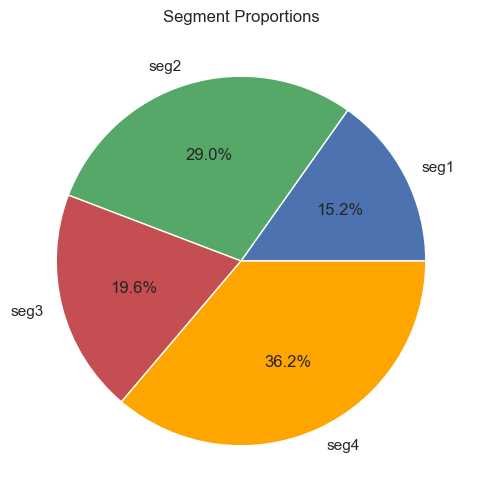

In [29]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment proportions'],
        labels = ['seg1', 'seg2', 'seg3', 'seg4'],
        autopct = '%1.1f%%',
        colors = ('b','g','r','orange'))
plt.title('Segment Proportions')

## Purchase Occasions and Purchase Incidence

In [35]:
segments_mean = df_pur_desc.groupby(['segment']).mean()
segments_mean

,N_visits,N_purchases,Average_n_purchases
segment,,,
0.0,118.828947,27.171053,0.228956
1.0,120.489655,34.965517,0.258081
2.0,117.367347,34.408163,0.282601
3.0,114.303867,22.823204,0.201760


In [36]:
segments_std = df_pur_desc.groupby(['segment']).std()
segments_std

,N_visits,N_purchases,Average_n_purchases
segment,,,
0.0,19.834239,19.495222,0.146761
1.0,39.398448,47.564198,0.181261
2.0,20.840775,25.997160,0.172682
3.0,17.762052,13.851663,0.120124


Quanto spesso persone di diversi segmetni visitano il negozio?

Text(0.5, 1.0, 'average number of store visits by segment')

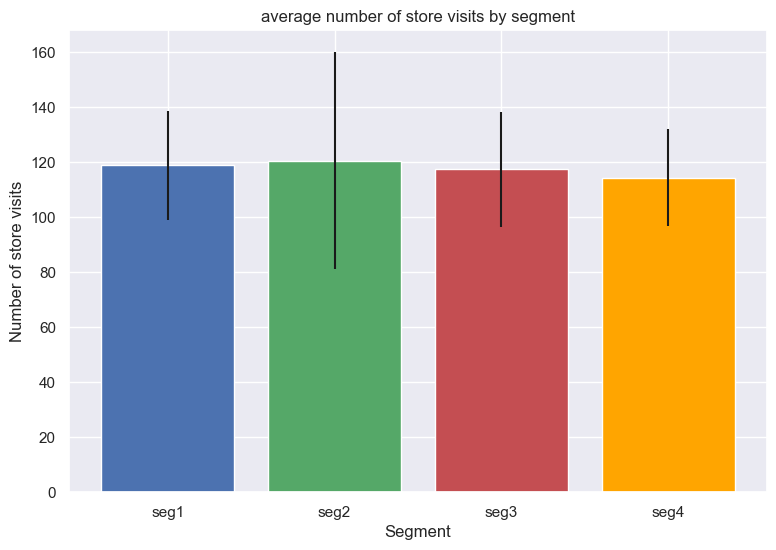

In [40]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
        tick_label=('seg1', 'seg2', 'seg3', 'seg4'),
        height = segments_mean['N_visits'],
        yerr = segments_std['N_visits'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of store visits')
plt.title('average number of store visits by segment')

Text(0.5, 1.0, 'average number of store purchases by segment')

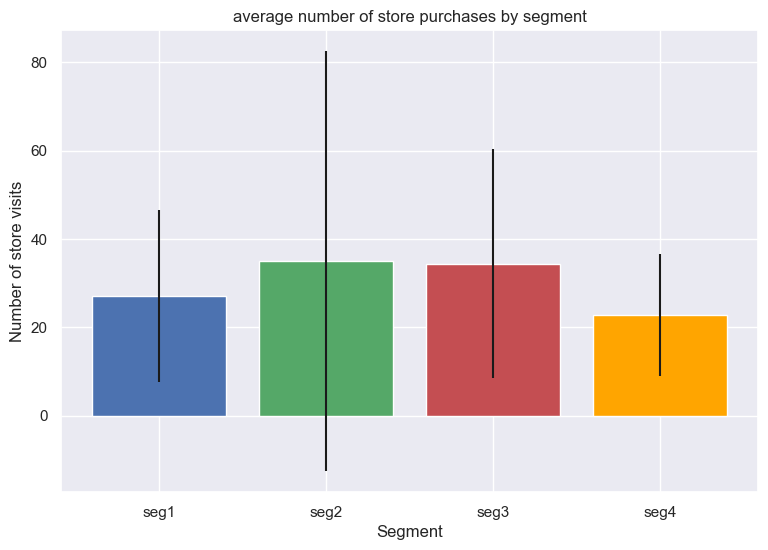

In [41]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
        tick_label=('seg1', 'seg2', 'seg3', 'seg4'),
        height = segments_mean['N_purchases'],
        yerr = segments_std['N_purchases'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of store visits')
plt.title('average number of store purchases by segment')

## Brand choice

In [50]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
ID,,,,,
200000001,0,1,0,0,0
200000001,0,0,0,0,1
200000001,1,0,0,0,0
200000001,0,0,0,1,0
200000001,0,1,0,0,0
...,...,...,...,...,...
200000500,0,1,0,0,0
200000500,1,0,0,0,0
200000500,0,1,0,0,0


In [42]:
df_purchase_incidence = df_pur_predictor[df_pur_predictor['Incidence']==1]

In [52]:
df_purchase_incidence

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
ID,,,,,,,,,,,,,,,,,,,,,
200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,1
200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,...,0,1,0,0,47,1,110866,1,0,1
200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,...,1,0,0,0,47,1,110866,1,0,1
200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,...,0,0,0,0,47,1,110866,1,0,1
200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,...,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,...,0,0,0,0,42,1,120946,1,0,1
200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,...,0,0,0,0,42,1,120946,1,0,1
200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,...,0,0,0,0,42,1,120946,1,0,1


In [56]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['segment']= df_purchase_incidence['segment']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment
ID,,,,,,
200000001,0,1,0,0,0,1
200000001,0,0,0,0,1,1
200000001,1,0,0,0,0,1
200000001,0,0,0,1,0,1
200000001,0,1,0,0,0,1
...,...,...,...,...,...,...
200000500,0,1,0,0,0,1
200000500,1,0,0,0,0,1
200000500,0,1,0,0,0,1


In [57]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [59]:
mean_brand_choice = temp.groupby(['segment'], as_index = True).mean()

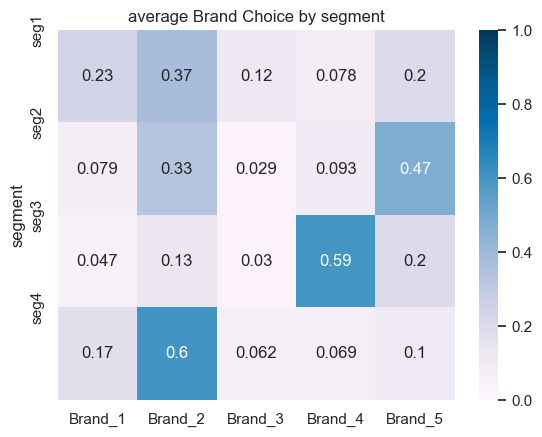

In [60]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0,1,2,3], ['seg1', 'seg2', 'seg3', 'seg4'])
plt.title('average Brand Choice by segment')
plt.show()

# Revenue by segment

In [65]:
temp = df_pur_predictor[df_pur_predictor['Brand']==1]
temp.loc[: , 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['segment', 'Revenue Brand 1']].groupby(['segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\armaod\AppData\Local\Temp\ipykernel_20228\2055967666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[: , 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


,Segment,Revenue Brand 1
0,0,1869.77
1,1,912.12
2,2,716.25
3,3,2807.51


In [66]:
temp = df_pur_predictor[df_pur_predictor['Brand']==2]
temp.loc[: , 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['segment', 'Revenue Brand 2']].groupby(['segment'], as_index = False).sum()

C:\Users\armaod\AppData\Local\Temp\ipykernel_20228\2336837835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[: , 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


In [67]:
temp = df_pur_predictor[df_pur_predictor['Brand']==3]
temp.loc[: , 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['segment', 'Revenue Brand 3']].groupby(['segment'], as_index = False).sum()

C:\Users\armaod\AppData\Local\Temp\ipykernel_20228\1526138101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[: , 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']


In [68]:
temp = df_pur_predictor[df_pur_predictor['Brand']==4]
temp.loc[: , 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['segment', 'Revenue Brand 4']].groupby(['segment'], as_index = False).sum()

C:\Users\armaod\AppData\Local\Temp\ipykernel_20228\2728719999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[: , 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']


In [69]:
temp = df_pur_predictor[df_pur_predictor['Brand']==5]
temp.loc[: , 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['segment', 'Revenue Brand 5']].groupby(['segment'], as_index = False).sum()

C:\Users\armaod\AppData\Local\Temp\ipykernel_20228\1306569670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[: , 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']


In [71]:
segments_brand_revenue['total revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                           segments_brand_revenue['Revenue Brand 2']+
                                           segments_brand_revenue['Revenue Brand 3']+
                                           segments_brand_revenue['Revenue Brand 4'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,total revenue
0,0,1869.77,3382.47,2303.31,1165.16,3638.75,8720.71
1,1,912.12,5222.99,603.79,2268.95,17838.72,9007.85
2,2,716.25,1419.99,725.54,13695.10,5505.01,16556.88
3,3,2807.51,11742.86,2388.88,1910.89,2638.52,18850.14


In [73]:
segments_brand_revenue['Segment proportions']=segm_prop['Segment proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({
    0 : 'Standard',
    1 : 'career focused',
    2 : 'fewer opportunities',
    3 : 'well-off'
})
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,total revenue,Segment proportions
0,Standard,1869.77,3382.47,2303.31,1165.16,3638.75,8720.71,0.152
1,career focused,912.12,5222.99,603.79,2268.95,17838.72,9007.85,0.290
2,fewer opportunities,716.25,1419.99,725.54,13695.10,5505.01,16556.88,0.196
3,well-off,2807.51,11742.86,2388.88,1910.89,2638.52,18850.14,0.362
